In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



In [6]:
df = pd.read_csv('/Users/a/Programming/Machine-Learning-Folder/Thirt-Meet/data/stunting_wasting_dataset.csv')

In [7]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [8]:
df.duplicated().sum()

np.int64(7308)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# 1. Mapping kolom Stunting -> biner
map_stunt = {'Stunted': 1, 'Severely Stunted': 1, 'Normal': 0, 'Tall': 0}
df['Stunting_bin'] = df['Stunting'].map(map_stunt).astype('int64')

# 2. Mapping kolom Jenis Kelamin -> biner
# Laki-Laki = 1, Perempuan = 0
df['JK_bin'] = (df['Jenis Kelamin'] == 'Laki-laki').astype(int)

print("Distribusi Stunting_bin:\n", df['Stunting_bin'].value_counts())
print("\nDistribusi JK_bin:\n", df['JK_bin'].value_counts())

df

Distribusi Stunting_bin:
 Stunting_bin
0    72320
1    20372
Name: count, dtype: int64

Distribusi JK_bin:
 JK_bin
1    46353
0    46339
Name: count, dtype: int64


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting,Stunting_bin,JK_bin
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight,0,1
1,Laki-laki,20,77.7,8.5,Stunted,Underweight,1,1
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight,0,1
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight,1,0
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight,1,0
...,...,...,...,...,...,...,...,...
99993,Laki-laki,12,83.4,11.8,Tall,Risk of Overweight,0,1
99994,Laki-laki,11,81.1,8.8,Normal,Normal weight,0,1
99995,Laki-laki,11,75.3,7.3,Normal,Underweight,0,1
99996,Laki-laki,21,93.7,14.8,Normal,Risk of Overweight,0,1


In [15]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix.round(2)

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting_bin,JK_bin
Umur (bulan),1.00,0.87,0.66,0.04,0.00
Tinggi Badan (cm),0.87,1.00,0.62,-0.29,0.07
Berat Badan (kg),0.66,0.62,1.00,0.02,0.04
Stunting_bin,0.04,-0.29,0.02,1.00,-0.01
JK_bin,0.00,0.07,0.04,-0.01,1.00


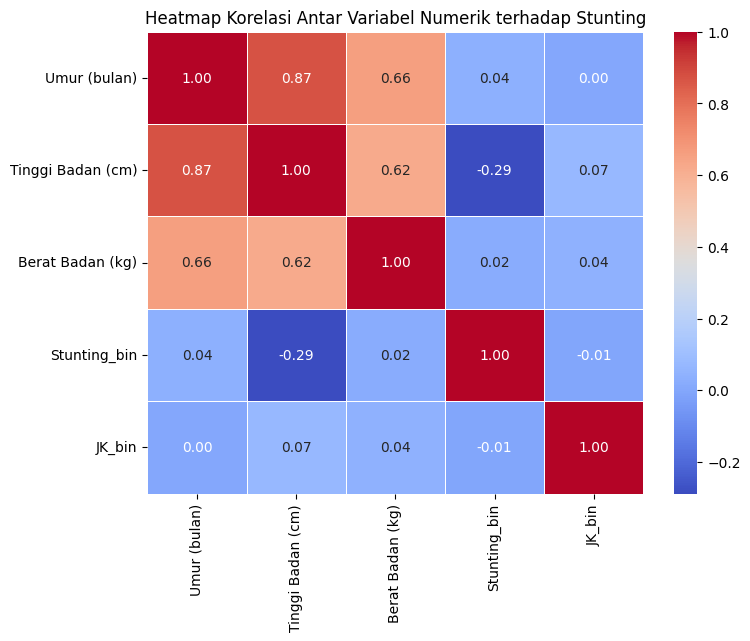

In [17]:
# Visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik terhadap Stunting', fontsize=12)
plt.show()